In [2]:
import os
import pandas as pd
from yaml import safe_load

# Dossier contenant les runs MLflow (expérience 0)
mlruns_path = "mlruns/0"

# Liste pour stocker les données combinées
combined_data = []

# Parcours des sous-dossiers de runs
for run_id in os.listdir(mlruns_path):
    run_dir = os.path.join(mlruns_path, run_id)
    if not os.path.isdir(run_dir):
        continue

    # Dictionnaire pour stocker les données de ce run
    run_data = {"run_id": run_id}

    # Récupération des params
    params_path = os.path.join(run_dir, "params")
    if os.path.exists(params_path):
        for param_file in os.listdir(params_path):
            with open(os.path.join(params_path, param_file), "r") as f:
                value = f.read().strip()
                run_data[param_file] = value  # clé = nom du paramètre

    # Récupération des metrics (dernière valeur de chaque métrique)
    metrics_path = os.path.join(run_dir, "metrics")
    if os.path.exists(metrics_path):
        for metric_file in os.listdir(metrics_path):
            with open(os.path.join(metrics_path, metric_file), "r") as f:
                lines = [line.strip() for line in f if line.strip()]
                if lines:
                    # Format: step timestamp value (on prend la dernière ligne)
                    last_value = float(lines[-1].split(" ")[1])
                    run_data[metric_file] = last_value  # clé = nom de la métrique

    combined_data.append(run_data)

# Création du DataFrame combiné
combined_df = pd.DataFrame(combined_data)


combined_df.columns

Index(['run_id', 'beta', 'unlearn_method', 'unlearn', 'unlearn_lr', 'quantile',
       'num_indexes_to_replace', 'unlearn_epochs', 'save_dir',
       'forget_accuracy', 'SVC_MIA_forget_efficacy : confidence',
       'SVC_MIA_training_privacy : correctness',
       'SVC_MIA_training_privacy : prob',
       'SVC_MIA_training_privacy : m_entropy',
       'SVC_MIA_forget_efficacy : entropy', 'retain_accuracy',
       'SVC_MIA_training_privacy : entropy',
       'SVC_MIA_forget_efficacy : correctness',
       'SVC_MIA_training_privacy : confidence',
       'SVC_MIA_forget_efficacy : m_entropy', 'RTE',
       'SVC_MIA_forget_efficacy : prob', 'val_accuracy', 'test_accuracy',
       'model'],
      dtype='object')

In [3]:
combined_df = combined_df[(combined_df["num_indexes_to_replace"] != 'None') & (combined_df["unlearn_epochs"] == '4')]
combined_df

,run_id,beta,unlearn_method,unlearn,unlearn_lr,quantile,num_indexes_to_replace,unlearn_epochs,save_dir,forget_accuracy,...,retain_accuracy,SVC_MIA_training_privacy : entropy,SVC_MIA_forget_efficacy : correctness,SVC_MIA_training_privacy : confidence,SVC_MIA_forget_efficacy : m_entropy,RTE,SVC_MIA_forget_efficacy : prob,val_accuracy,test_accuracy,model
55,606ec6b1f8b144568c673375a49001bb,0.9,SalUn,SalUn,0.0001,0.55,4500,4,./results/cifar10,53.844445,...,90.446914,0.515389,0.461556,0.516167,0.714000,62.795501,0.855333,84.30,87.311111,./results/cifar10/1resnet18_ep100model_SA_best...
58,48acfbab1f9f470f8b656877d49be3ba,0.9,VarGrad,VarGrad,0.0001,0.55,4500,4,./results/cifar10,11.800000,...,89.069136,0.510347,0.882000,0.518292,0.550222,50.310703,0.452667,78.96,85.900000,./results/cifar10/1resnet18_ep100model_SA_best...
87,bb71fe4f11944b2a9a4c7ed9a7de319f,0.9,SalUn,SalUn,0.01,0.55,4500,4,./results/cifar10,27.111111,...,91.167901,0.515472,0.728889,0.516806,0.951333,61.802995,0.756222,82.38,87.733333,./results/cifar10/1resnet18_ep100model_SA_best...
172,e36f17a219b344ac88b164ab6629dbb6,0.9,pSalUn,pSalUn,0.0001,0.55,4500,4,./results/cifar10,74.111111,...,91.728395,0.517347,0.258889,0.516111,0.572889,687.762007,0.928667,86.96,88.244444,./results/cifar10/1resnet18_ep100model_SA_best...
189,47dcb076f2184463b91a1ff5fb9bbfe5,0.9,VarGrad,VarGrad,0.0001,0.55,4500,4,./results/cifar10,10.622222,...,88.992593,0.510528,0.893778,0.517694,0.549778,50.694857,0.445333,78.88,85.800000,./results/cifar10/1resnet18_ep100model_SA_best...
282,4329822bff5e4ba9908f59b0e5043ab8,0.9,FT,FT,0.0001,0.55,4500,4,./results/cifar10,96.422222,...,93.958025,0.519556,0.035778,0.525792,0.243778,182.515972,0.988000,90.40,89.500000,./results/cifar10/1resnet18_ep100model_SA_best...
329,316d868a752c4b84b28aa5253fdd8dc3,0.9,NGPlus,NGPlus,0.0001,0.55,4500,4,./results/cifar10,71.377778,...,91.802469,0.516944,0.286222,0.515944,0.605556,42.199656,0.922667,86.88,88.355556,./results/cifar10/1resnet18_ep100model_SA_best...


/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_2611/2404670270.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(methods))


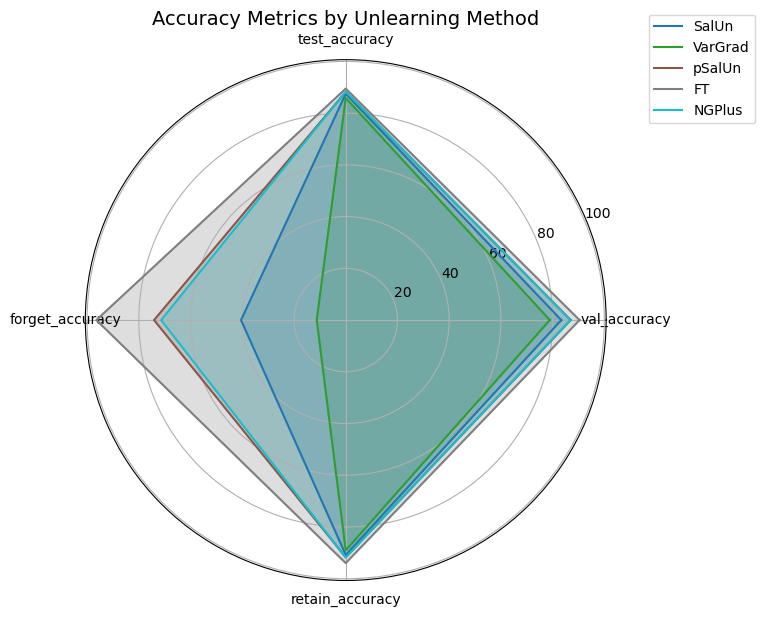

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Étape 1 : sélectionner les colonnes d'accuracy ---
accuracy_cols = ["val_accuracy", "test_accuracy", "forget_accuracy", "retain_accuracy"]
methods = combined_df["unlearn_method"].unique()

# --- Étape 2 : calcul des moyennes par méthode ---
method_means = combined_df.groupby("unlearn_method")[accuracy_cols].mean()

# --- Étape 3 : construction du radar plot ---
# Préparation des angles
labels = accuracy_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # boucle fermée

# Style
plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

# Couleurs pour les différentes méthodes
colors = plt.cm.get_cmap("tab10", len(methods))

# Tracer chaque méthode
for idx, method in enumerate(methods):
    values = method_means.loc[method].tolist()
    values += values[:1]  # boucle fermée
    plt.plot(angles, values, label=method, color=colors(idx))
    plt.fill(angles, values, alpha=0.25, color=colors(idx))

# Labels axes
plt.xticks(angles[:-1], labels)
plt.title("Accuracy Metrics by Unlearning Method", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_2611/1716047469.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(methods))


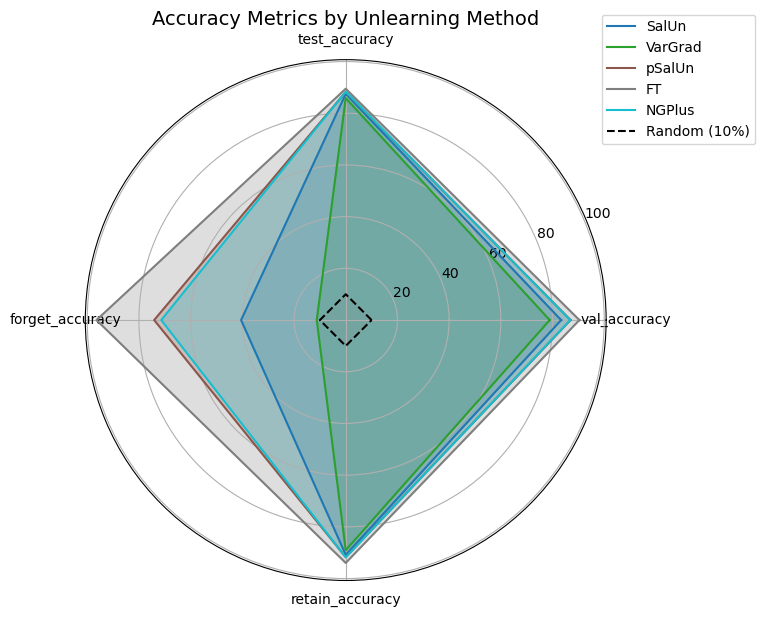

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Étape 1 : sélectionner les colonnes d'accuracy ---
accuracy_cols = ["val_accuracy", "test_accuracy", "forget_accuracy", "retain_accuracy"]
methods = combined_df["unlearn_method"].unique()

# --- Étape 2 : calcul des moyennes par méthode ---
method_means = combined_df.groupby("unlearn_method")[accuracy_cols].mean()

# --- Étape 3 : angles pour le radar plot ---
labels = accuracy_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # boucle fermée

# --- Étape 4 : plot ---
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Couleurs
colors = plt.cm.get_cmap("tab10", len(methods))

# Tracer chaque méthode
for idx, method in enumerate(methods):
    values = method_means.loc[method].tolist()
    values += values[:1]  # boucle fermée
    ax.plot(angles, values, label=method, color=colors(idx))
    ax.fill(angles, values, alpha=0.25, color=colors(idx))

# --- Ajout de la courbe "random" ---
random_value = 10.0  # baseline à 10%
random_values = [random_value] * num_vars
random_values += random_values[:1]
ax.plot(angles, random_values, label="Random (10%)", color="black", linestyle="--")
ax.fill(angles, random_values, alpha=0.1, color="gray")

# --- Mise en forme ---
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Accuracy Metrics by Unlearning Method", size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()
